PROYECTO: SPOTIFY AND YOUTUBE
Alumnno: Federido Domañski
#Data Science II: Fundamentos para la Ciencia de Datos
#Comision: 61725


Resumen
Este trabajo analiza un dataset con información de Spotify y YouTube, compuesto por 28 columnas y más de 10,000 registros.
Se realiza un proceso de limpieza de datos para corregir valores nulos o inconsistentes, seguido de un análisis exploratorio (EDA)
con estadísticas descriptivas y gráficos para comprender la distribución y las relaciones entre las variables. 
Además, se utiliza la API de Spotify para enriquecer el dataset con nuevas variables, como el género musical de las canciones. 
Finalmente, se implementara un modelo de machine learning para predecir la cantidad de reproducciones y clasificar las canciones 
según su popularidad, identificando patrones relevantes en los datos.



Objetivo
El objetivo de este trabajo es analizar un dataset de Spotify y YouTube para identificar patrones y predecir las reproducciones de una canción.
Se desarrollarán dos modelos de machine learning:

Modelo de clasificación para determinar si una canción será un hit o no.
Modelo de regresión para estimar el número de reproducciones de las canciones.
Más allá del análisis técnico, el trabajo busca explorar desde una perspectiva cultural y del comportamiento humano 
las razones por las que ciertas canciones se vuelven populares.
¿Existen patrones objetivos que expliquen el éxito musical o la percepción de una "buena canción" depende de factores subjetivos e impredecibles? 
Se analizarán variables como el género musical, la duración, el tempo, el lenguaje emocional de la letra, entre otras,
para comprender si es posible cuantificar los gustos musicales o si estos responden a una combinación más compleja de experiencias individuales y fenómenos sociales.


Contexto comercial:
En la actualidad, plataformas como Spotify y YouTube dominan la distribución musical, permitiendo a los artistas alcanzar audiencias globales rápidamente.
El éxito de una canción ya no depende de radios o ventas físicas, sino del impacto en estas plataformas digitales.
Para aprovechar esta dinámica, discográficas, artistas y equipos de marketing pueden utilizan modelos predictivos para anticipar 
el desempeño de una canción. Esto es clave para:
1)	Optimizar campañas : Invertir en promoción estratégica según el potencial éxito.
2)	Maximizar ingresos : Priorizar canciones con alta probabilidad de ser hits.
3)	Descubrir talento : Identificar temprano canciones emergentes con potencial viral.
4)	Negociaciones : Mejorar acuerdos con artistas de alto rendimiento proyectado.



Dataset: Spotify and Youtube(Kaggle)
https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube"

Hipotesis o Preguntas de interes

1) Existe una correlación entre la popularidad de una canción en Spotify (reproducciones) y youtube(visualizaciones)?

2) Al analizar la "valencia" de las canciones, que representa su positividad o negatividad,
se observara que existe una mayor cantidad de canciones con alta valencia (positivas,alegres).
Esto sugiere que la distribución de la valencia en las canciones no es normal, sino que está sesgada hacia valores altos de positividad.

3) Las canciones lanzadas como sencillos ("singles") en Spotify tienen, en promedio, más reproducciones o vistas
que aquellas incluidas en álbumes o compilados. Esto se debe a que, al lanzarse de forma individual, los sencillos reciben mayor visibilidad
y atención por parte de los usuarios, lo cual aumenta sus reproducciones en comparación con las canciones agrupadas en un álbum.


Hipótesis futuras:
Existen interrogantes pendientes sobre la relación entre la bailabilidad y el número de reproducciones de las canciones.
o si las personas prefieren bailar canciones alegres, positivas es decir con alta valencia.
Ademas me gustaria, analizar si las personas tienden a comentar más sobre canciones con un tono feliz o triste.
Tambien se podrian abordar aspectos como la relacion entre la  "energía" y la "valencia" de las canciones


Propuestas de Modelos de Machine Learning para la Predicción del Éxito Musical

Para las próxima se entrega, se implementarán modelos de machine learning con los siguientes objetivos principales:

Estimación del Número de Reproducciones (Modelo de regresion)
Se desarrollará un modelo de regresión que permita predecir el número de reproducciones de una canción en Spotify/Youtube.
Este modelo se construirá en función de diversas variables musicales, entre las que se incluyen: energia, valencia, volumen, acustica etc.
Al analizar estas características, el modelo de regresión permitirá estimar el impacto de cada variable en el número de reproducciones,
brindando una proyección sobre la popularidad esperada de la canción.

Clasificación del Potencial de Éxito: Hit o No-Hit (Modelo de clasificacion)
Adicionalmente, se explorará un modelo de clasificación supervisada para categorizar canciones en dos clases: "Hit" (éxito) o "No-Hit" (sin éxito destacado).
Para este modelo, se construirá una nueva variable de clasificación que represente el estado de la canción como "Hit" o "No-Hit",
basándonos en criterios de popularidad (por ejemplo, alcanzar un umbral de reproducciones).
Las mismas variables musicales —energía, valencia, volumen, acústica e instrumentalidad— servirán como predictores para este modelo


Indice

1) Obtencion y analsis de la base de datos Kaggle(Spotify_Youtube) 
2) Api de spotify 
3) Union de los datos de Kaggle con los datos de la Api de spotify
4) Generos musicales, reduccion y feature engineering
5) Analisis exploratorio de datos (EDA)
6) Hipotesis I 
7) Hipotesis II  
8) Hipotesis III  
9) Analsis de variables. Correlacion y VIF
10) Chi cuadrado. Tablas de contingencia
11) Insights
12) Modelo de clasificacion Randomforest
13) Modelo de clasificacion Randomforest mejores variables


Punto.1) Obtencion y analsis de la base de datos Kaggle(Spotify_Youtube) 

In [1]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

#from google.colab import files
#import io

import matplotlib.pyplot as plt


df = pd.read_csv("Spotify_Youtube.csv")

df.tail()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,0.498,0.938,6.0,...,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


In [2]:
#Renombramos las columnas, del ingles al español


df=df.rename(columns={'Unnamed: 0': 'id','Artist':'artista','Track':'cancion','Danceability':'bailabilidad','Energy':'energia','Key':'tonalidad','Loudness':'volumen','Speechiness':'hablabilidad','Acousticness':'acustica','Instrumentalness':'instrumental','Liveness':'vivencia','Valence':'valencia','Tempo':'tiempo','Duration_ms':'duracion','Title':'titulo_youtube','Channel':'canal','Views':'vistas','Likes':'likes','Comments':'comentarios','Description':'descripcion_youtube','Licensed':'licencia','Stream':'reproducciones_spotify','Album_type':'album_type'})
df.columns

Index(['id', 'artista', 'Url_spotify', 'cancion', 'Album', 'album_type', 'Uri',
       'bailabilidad', 'energia', 'tonalidad', 'volumen', 'hablabilidad',
       'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo',
       'duracion', 'Url_youtube', 'titulo_youtube', 'canal', 'vistas', 'likes',
       'comentarios', 'descripcion_youtube', 'licencia', 'official_video',
       'reproducciones_spotify'],
      dtype='object')

Descripcion de las variables

Cancion: nombre de la canción, tal como se ve en la plataforma Spotify.

Artista: nombre del artista.

Url_spotify: la URL del artista.

Album: el álbum en el que se encuentra la canción en Spotify.

Album_type: indica si la canción se lanzó en Spotify como single o está contenida en un álbum.

Uri: un enlace de Spotify que se utiliza para encontrar la canción a través de la API.

Bailabilidad: describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del pulso y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.

Energia: es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, velocidad de inicio y entropía general.

Tonalidad: la tonalidad en la que se encuentra la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna tonalidad, el valor es -1.

Volumen: el volumen general de una pista en decibeles (dB). Los valores de volumen se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.

Hablabilidad: detecta la presencia de palabras habladas en una pista. Cuanto más parecida a un habla sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cerca de 1.0 estará el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente estén compuestas completamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como diálogo, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores inferiores a 0,33 probablemente representan música y otras pistas que no son de diálogo.

Acustica: una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1,0 representa una alta confianza de que la pista es acústica.

Instrumentalidad: predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

Vivencia: detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista sea en vivo.

Valencia:una medida de 0,0 a 1,0 que describe la positividad musical transmitida por una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

Tempo: tempo general estimado de una canción en pulsaciones por minuto (PPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de las pulsaciones.

Duración: duración de la canción en milisegundos.

Reproducciones_spotify: número de reproducciones de la canción en Spotify.

Url_youtube: url del vídeo enlazado a la canción en Youtube, si lo hay.

Título: título del videoclip en Youtube.

Canal: nombre del canal que ha publicado el vídeo.

Vistas: número de visualizaciones.

Likes: número de me gusta.

Comentarios: número de comentarios.

Descripción_youtube: descripción del vídeo en Youtube.

Licencia: indica si el video representa contenido con licencia, lo que significa que el contenido se cargó en un canal vinculado a un socio de contenido de YouTube y luego fue reclamado por ese socio.

Official_video: valor booleano que indica si el video encontrado es el video oficial de la canción.


In [3]:
df.shape


(20718, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20718 non-null  int64  
 1   artista                 20718 non-null  object 
 2   Url_spotify             20718 non-null  object 
 3   cancion                 20718 non-null  object 
 4   Album                   20718 non-null  object 
 5   album_type              20718 non-null  object 
 6   Uri                     20718 non-null  object 
 7   bailabilidad            20716 non-null  float64
 8   energia                 20716 non-null  float64
 9   tonalidad               20716 non-null  float64
 10  volumen                 20716 non-null  float64
 11  hablabilidad            20716 non-null  float64
 12  acustica                20716 non-null  float64
 13  instrumental            20716 non-null  float64
 14  vivencia                20716 non-null

In [5]:
#Se ha procedido a una depuración del conjunto de datos, eliminando variables que no contribuyen significativamente al modelo.
#Se va hacer un nuevo dataset con las variables mas relevantes, llamado df_reducido

df_reducido =df[['id','artista','Uri','cancion','album_type','bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','likes','comentarios','reproducciones_spotify']]
df_reducido.tail()


,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
20713,20713,SICK LEGEND,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.44800,0.0000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9227144.0
20714,20714,SICK LEGEND,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.02800,0.0000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,10898176.0
20715,20715,SICK LEGEND,spotify:track:4jk00YxPtPbhvHJE9N4ddv,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.02430,0.0000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6226110.0
20716,20716,SICK LEGEND,spotify:track:5EyErbpsugWliX006eTDex,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.35600,0.0184,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6873961.0
20717,20717,SICK LEGEND,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,MISS YOU HARDSTYLE,single,0.498,0.938,6.0,-4.543,0.1070,0.00277,0.9110,0.1360,0.0787,160.067,181500.0,158697.0,2484.0,0.0,5695584.0


In [6]:
df_reducido.shape

(20718, 20)

In [7]:
df_reducido.describe()

,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [8]:
print("\nValores nulos en el conjunto de datos:")
print(df_reducido.isnull().sum())


Valores nulos en el conjunto de datos:
id                          0
artista                     0
Uri                         0
cancion                     0
album_type                  0
bailabilidad                2
energia                     2
tonalidad                   2
volumen                     2
hablabilidad                2
acustica                    2
instrumental                2
vivencia                    2
valencia                    2
tiempo                      2
duracion                    2
vistas                    470
likes                     541
comentarios               569
reproducciones_spotify    576
dtype: int64


In [9]:
#Estrategia 1: remover filas faltantes:Los datos faltantes que faltan en bailabilidad son los mismos que faltan
# en energia, tonalidad, volumen, hablabilidad, acustica, instrumental, vivencia, valencia, tiempo y duracion
#como solo son dos filas, estas se van a borrar



df_limpio_1 =df_reducido.dropna(subset=['energia'])
print(df_limpio_1.isnull().sum())


id                          0
artista                     0
Uri                         0
cancion                     0
album_type                  0
bailabilidad                0
energia                     0
tonalidad                   0
volumen                     0
hablabilidad                0
acustica                    0
instrumental                0
vivencia                    0
valencia                    0
tiempo                      0
duracion                    0
vistas                    469
likes                     540
comentarios               568
reproducciones_spotify    576
dtype: int64


In [10]:
df_limpio_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20716 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20716 non-null  int64  
 1   artista                 20716 non-null  object 
 2   Uri                     20716 non-null  object 
 3   cancion                 20716 non-null  object 
 4   album_type              20716 non-null  object 
 5   bailabilidad            20716 non-null  float64
 6   energia                 20716 non-null  float64
 7   tonalidad               20716 non-null  float64
 8   volumen                 20716 non-null  float64
 9   hablabilidad            20716 non-null  float64
 10  acustica                20716 non-null  float64
 11  instrumental            20716 non-null  float64
 12  vivencia                20716 non-null  float64
 13  valencia                20716 non-null  float64
 14  tiempo                  20716 non-null  flo

In [11]:
#Estrategia 2, para los valorse faltantes en las columnas vistas, likes, comentarios y reproducciones_spotify se va a usar la mediana de cada columna

# Reemplaza los valores nulos con la mediana de cada columna correspondiente
df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
df_limpio_1['likes'].fillna(df_limpio_1['likes'].median(), inplace=True)
df_limpio_1['comentarios'].fillna(df_limpio_1['comentarios'].median(), inplace=True)
df_limpio_1['reproducciones_spotify'].fillna(df_limpio_1['reproducciones_spotify'].median(), inplace=True)


print(df_limpio_1.isnull().sum())



id                        0
artista                   0
Uri                       0
cancion                   0
album_type                0
bailabilidad              0
energia                   0
tonalidad                 0
volumen                   0
hablabilidad              0
acustica                  0
instrumental              0
vivencia                  0
valencia                  0
tiempo                    0
duracion                  0
vistas                    0
likes                     0
comentarios               0
reproducciones_spotify    0
dtype: int64


C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\210331472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\210331472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['vistas'].fillna(d

Punto 2) Api de spotify 

In [12]:
from dotenv import load_dotenv
import os
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Obtener las claves de las variables de entorno
client_id = os.getenv("SPOTIFY_CLIENT_ID")
client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")
redirect_uri = os.getenv("SPOTIFY_REDIRECT_URI")

# Definir el scope
scope = "user-library-read playlist-read-private"

# Crear el objeto Spotify con la autenticación
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri,
                                              scope=scope),
                                              requests_timeout=10)

# Lista de URIs (ejemplo con 20,718 elementos)
canciones_lista = df_limpio_1["Uri"].tolist() # Asegúrate de que df está definido

# Dividir en bloques de 50 URIs
def chunk_list(lst, chunk_size=50):
    return [lst[i:i+chunk_size] for i in range(0, len(lst), chunk_size)]

# Procesar en bloques
resultados = []
for i, chunk in enumerate(chunk_list(canciones_lista)):
    try:
        # Obtener datos de las canciones en bloque
        tracks = sp.tracks(chunk)['tracks']
        
        # Extraer IDs de artistas
        artist_ids = [track['artists'][0]['id'] for track in tracks if track]
        
        # Obtener datos de artistas en bloque (máximo 50 por request)
        artist_chunks = chunk_list(artist_ids)
        artist_info = {}
        for a_chunk in artist_chunks:
            artists = sp.artists(a_chunk)['artists']
            for artist in artists:
                artist_info[artist['id']] = artist
        
        # Mapear datos
        for track in tracks:
            if track:
                artist_id = track['artists'][0]['id']
                artist_data = artist_info.get(artist_id, {})
                
                resultados.append({
                    'Uri': track['uri'],
                    'Nombre': track['name'],
                    'Artista': track['artists'][0]['name'],
                    'Popularidad': track['popularity'],
                    'Géneros': ', '.join(artist_data.get('genres', []))
                })
            else:
                resultados.append({
                    'Uri': chunk[i],
                    'Nombre': None,
                    'Artista': None,
                    'Popularidad': None,
                    'Géneros': None
                })
        
        print(f"✅ Procesado bloque {i+1}/{len(chunk_list(canciones_lista))}")
        
    except SpotifyException as e:
        print(f"⚠️ Error en bloque {i+1}: {e}")
        time.sleep(10)  # Esperar más en caso de error

# Convertir a DataFrame
df_api = pd.DataFrame(resultados)
print(df_api.head())  # Mostrar los primeros registros


✅ Procesado bloque 1/415
✅ Procesado bloque 2/415
✅ Procesado bloque 3/415
✅ Procesado bloque 4/415
✅ Procesado bloque 5/415
✅ Procesado bloque 6/415
✅ Procesado bloque 7/415
✅ Procesado bloque 8/415
✅ Procesado bloque 9/415
✅ Procesado bloque 10/415
✅ Procesado bloque 11/415
✅ Procesado bloque 12/415
✅ Procesado bloque 13/415
✅ Procesado bloque 14/415
✅ Procesado bloque 15/415
✅ Procesado bloque 16/415
✅ Procesado bloque 17/415
✅ Procesado bloque 18/415
✅ Procesado bloque 19/415
✅ Procesado bloque 20/415
✅ Procesado bloque 21/415
✅ Procesado bloque 22/415
✅ Procesado bloque 23/415
✅ Procesado bloque 24/415
✅ Procesado bloque 25/415
✅ Procesado bloque 26/415
✅ Procesado bloque 27/415
✅ Procesado bloque 28/415
✅ Procesado bloque 29/415
✅ Procesado bloque 30/415
✅ Procesado bloque 31/415
✅ Procesado bloque 32/415
✅ Procesado bloque 33/415
✅ Procesado bloque 34/415
✅ Procesado bloque 35/415
✅ Procesado bloque 36/415
✅ Procesado bloque 37/415
✅ Procesado bloque 38/415
✅ Procesado bloque 39

In [13]:
df_api

,Uri,Nombre,Artista,Popularidad,Géneros
0,spotify:track:0d28khcov6AiegSCpG5TuT,Feel Good Inc.,Gorillaz,89,
1,spotify:track:1foMv2HQwfQ2vntFf9HFeG,Rhinestone Eyes,Gorillaz,79,
2,spotify:track:64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz,63,
3,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,On Melancholy Hill,Gorillaz,84,
4,spotify:track:7yMiX7n9SBvadzox8T5jzT,Clint Eastwood,Gorillaz,75,
...,...,...,...,...,...
20711,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,JUST DANCE - HARDSTYLE,SICK LEGEND,52,hardstyle
20712,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,SET FIRE TO THE RAIN - HARDSTYLE,SICK LEGEND,52,hardstyle
20713,spotify:track:4jk00YxPtPbhvHJE9N4ddv,OUTSIDE - HARDSTYLE SPED UP,SICK LEGEND,56,hardstyle
20714,spotify:track:5EyErbpsugWliX006eTDex,ONLY GIRL - HARDSTYLE,SICK LEGEND,53,hardstyle


In [14]:
df_api.describe()

,Popularidad
count,20716.000000
mean,55.831724
std,20.449687
min,0.000000
25%,51.000000
50%,61.000000
75%,69.000000
max,95.000000


In [15]:
df_api['Géneros'] = df_api['Géneros'].astype('category')
print(df_api['Géneros'].describe())
print(df_api['Géneros'].value_counts())

count     20716
unique     1273
top            
freq       5110
Name: Géneros, dtype: object
Géneros
                                                                        5110
latin pop                                                                422
country                                                                  283
r&b                                                                      235
k-pop                                                                    224
                                                                        ... 
reggaeton chileno, chilean trap, chilean mambo, mambo, guaracha, rkt       1
melbourne bounce, slap house, big room                                     1
dancehall, afroswing, soca                                                 1
cumbia, cuarteto, rkt, turreo                                              1
punjabi hip hop, desi hip hop, punjabi pop, hindi hip hop, bhangra         1
Name: count, Length: 1273, dtype: int64


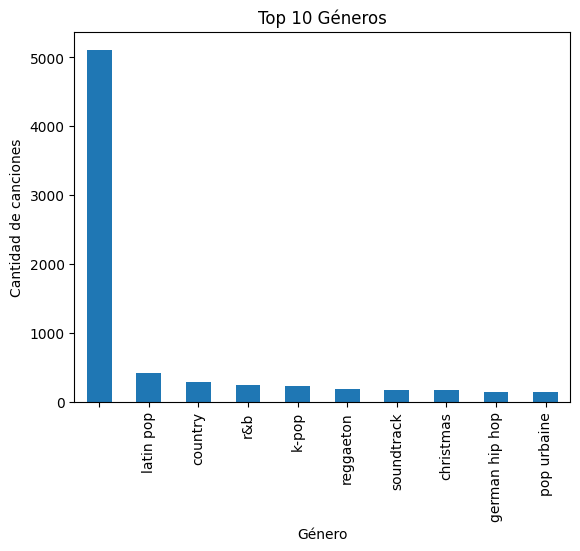

In [16]:
import matplotlib.pyplot as plt

# Gráfico de barras de los 10 géneros más frecuentes
df_api['Géneros'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros')
plt.xlabel('Género')
plt.ylabel('Cantidad de canciones')
plt.show()

Análisis de los géneros musicales
La columna "Géneros" contiene 1274 géneros únicos . El género más frecuente, con 5118 repeticiones , no tiene un valor visible (aparece vacío o sin datos). Le siguen géneros populares como "latin pop" (422), "country" (283) y "r&b" (235). Muchos géneros específicos aparecen solo 1 vez , mostrando una distribución típica donde pocos géneros son dominantes y otros tienen baja representación.

Punto 3) Union de los datos de Kaggle con los datos de la Api de spotify

In [17]:
# Combina df_limpio_1 con df_url_spotify 
df_kaggle = pd.merge(
    df_limpio_1,
    df_api,
    on='Uri',
    how='inner'  
)

print("df_kaggle")
print(df_kaggle.columns)


df_kaggle

df_kaggle
Index(['id', 'artista', 'Uri', 'cancion', 'album_type', 'bailabilidad',
       'energia', 'tonalidad', 'volumen', 'hablabilidad', 'acustica',
       'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion', 'vistas',
       'likes', 'comentarios', 'reproducciones_spotify', 'Nombre', 'Artista',
       'Popularidad', 'Géneros'],
      dtype='object')


,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,...,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify,Nombre,Artista,Popularidad,Géneros
0,0,Gorillaz,spotify:track:0d28khcov6AiegSCpG5TuT,Feel Good Inc.,album,0.818,0.705,6.0,-6.679,0.1770,...,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09,Feel Good Inc.,Gorillaz,89,
1,1,Gorillaz,spotify:track:1foMv2HQwfQ2vntFf9HFeG,Rhinestone Eyes,album,0.676,0.703,8.0,-5.815,0.0302,...,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08,Rhinestone Eyes,Gorillaz,79,
2,2,Gorillaz,spotify:track:64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz,63,
3,2,Gorillaz,spotify:track:64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz,63,
4,2,Gorillaz,spotify:track:64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz,63,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26397,20713,SICK LEGEND,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,...,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06,JUST DANCE - HARDSTYLE,SICK LEGEND,52,hardstyle
26398,20714,SICK LEGEND,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,...,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07,SET FIRE TO THE RAIN - HARDSTYLE,SICK LEGEND,52,hardstyle
26399,20715,SICK LEGEND,spotify:track:4jk00YxPtPbhvHJE9N4ddv,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,...,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06,OUTSIDE - HARDSTYLE SPED UP,SICK LEGEND,56,hardstyle
26400,20716,SICK LEGEND,spotify:track:5EyErbpsugWliX006eTDex,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,...,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06,ONLY GIRL - HARDSTYLE,SICK LEGEND,53,hardstyle


In [18]:
print(df_kaggle.isnull().sum())

id                        0
artista                   0
Uri                       0
cancion                   0
album_type                0
bailabilidad              0
energia                   0
tonalidad                 0
volumen                   0
hablabilidad              0
acustica                  0
instrumental              0
vivencia                  0
valencia                  0
tiempo                    0
duracion                  0
vistas                    0
likes                     0
comentarios               0
reproducciones_spotify    0
Nombre                    0
Artista                   0
Popularidad               0
Géneros                   0
dtype: int64


Punto 4) Generos musicales, reduccion y feature engineering

En los datos obtenidos a través de la API de Spotify, se identificaron más de 1000 géneros musicales diferentes,
lo que representa un desafío significativo para el desarrollo de los modelos de machine learning.
Esta alta diversidad genera dispersión en los datos, ya que algunos géneros tienen muy pocas observaciones, 
lo cual dificulta que el modelo aprenda patrones consistentes y realice predicciones precisas.
Para abordar este problema, se decidió agrupar los géneros musicales en categorías más generales, 
lo que reduce la complejidad del modelo y mejora su capacidad para identificar relaciones relevantes.

Otro desafío detectado es la falta de información en una parte de las canciones,
las cuales no tienen asociado ningún género musical. Para enfrentar esta situación, se consideraron dos enfoques:
a) Excluir las observaciones sin género del análisis. Con el objetivo de trabajar únicamente con datos completos.
b) Implementar un modelo de clasificación que, a partir de las características de las canciones, 
pueda predecir el género musical de aquellas observaciones donde esta información está ausente.
Se exploró la segunda opción mediante modelos de clasificación simples, pero los resultados fueron insatisfactorios, 
ya que el modelo solo logró clasificar de manera precisa algunos géneros específicos, mientras que otros no pudieron ser correctamente identificados. 
Este enfoque se podria mejorar en la siguente parte del curso.


In [19]:
#problema hay muchos generos
# Eliminar filas donde 'Generos' es NaN
# Contar valores no nulos
total_registros = len(df_kaggle)
no_nulos = df_kaggle['Géneros'].count()  # Cuenta valores NO NaN
nulos = df_kaggle['Géneros'].isna().sum()  # Cuenta NaN

# Contar cadenas vacías (si existen)
vacias = df_kaggle[df_kaggle['Géneros'].astype(str).str.strip() == ''].shape[0]

# Mostrar resultados
print(f"Total de registros: {total_registros}")
print(f"Registros con género definido (no nulos): {no_nulos}")
print(f"Registros con NaN en género: {nulos}")
print(f"Registros con cadenas vacías en género: {vacias}")

Total de registros: 26402
Registros con género definido (no nulos): 26402
Registros con NaN en género: 0
Registros con cadenas vacías en género: 6122


In [20]:
# Filtrar filas con cadenas vacías (incluyendo espacios en blanco)
mask_vacias = df_kaggle['Géneros'].str.strip() == ''

# Crear DataFrames
df_kaggle_clean = df_kaggle[~mask_vacias]  # Filas sin cadenas vacías
df_kaggle_empty = df_kaggle[mask_vacias]   # Filas con cadenas vacías

# Verificar tamaños
print(f"Filas en df_kaggle_clean: {len(df_kaggle_clean)}")  # Debería ser 26402 - 6126 = 20276
print(f"Filas en df_kaggle_empty: {len(df_kaggle_empty)}")  # Debería ser 6127

Filas en df_kaggle_clean: 20280
Filas en df_kaggle_empty: 6122


In [21]:
#Del trato de tener menos generos musicales
mapeo_automatico = {
    # 1. Pop
    'Pop': r'pop|dance pop|indie pop|k-pop|j-pop|mandopop|cantopop|soft pop|pop urbaine|slap house|colombian pop|dream pop|french pop|german pop|t-pop|iranian pop|persian pop|arabic pop|kurdish pop|african pop',

    # 2. Rock
    'Rock': r'rock|alternative rock|classic rock|hard rock|punk|punk rock|indie rock|latin rock|rock en español|argentine rock|post-grunge|glam metal|nu metal|metalcore|emo|grunge|metal|heavy metal|thrash metal|groove metal|progressive rock|symphonic rock|art rock|stoner rock|garage rock|shoegaze|post-punk',

    # 3. Hip-Hop
    'Hip-Hop': r'hip.?hop|rap|trap|r&b|gangster rap|east coast hip hop|west coast hip hop|southern hip hop|crunk|drill|phonk|memphis rap|rage rap|cloud rap|dark trap|horrorcore|boom bap|underground hip hop|g-funk|trap funk|funk consciente|dembow|neoperreo|uk drill|grime|afroswing|punjabi hip hop|hindi hip hop|desi hip hop|latin hip hop|mexican hip hop|brazilian hip hop|brazilian trap',

    # 4. Electrónica
    'Electrónica': r'electro|edm|house|techno|disco|future house|melbourne bounce|big room|trance|funky house|acid jazz|lo-fi|hyperpop|eurodance|europop|italo dance|tech house|bass house|progressive house|electronica|dubstep|drum and bass|liquid funk|breakbeat|rave|hardcore techno|nightcore|ambient|synthpop|new wave|darkwave|witch house|shoegaze|slowcore',

    # 5. Jazz
    'Jazz': r'jazz|blues|soul|motown|funk|smooth jazz|jazz fusion|nu jazz|funk rock|funk pop|brazilian funk|trap funk|soul jazz|jazz blues|bebop|cool jazz|free jazz|hard bop|swing music|big band|vocal jazz|neo soul|quiet storm|r&b',

    # 6. Clásica
    'Clásica': r'classical|opera|orchestra|symphony|baroque|classical piano|minimalism|ambient|neoclassical|chamber music|requiem|choral|gregorian chant|medieval|renaissance|romantic|modern classical|contemporary classical',

    # 7. Latina
    'Latina': r'latin|salsa|cumbia|banda|norteño|corrido|grupera|tejano|duranguense|cumbia sonidera|sertanejo|forró|arrocha|agronejo|piseiro|bachata|merengue|bolero|huayno|chicha|son cubano|timba|tango|mariachi|ranchera|vallenato|reggaeton chileno|chilean trap|chilean mambo|reggaeton mexicano|popular colombian music|trova|nueva trova|latin folk|latin indie|latin alternative|latin dance|spanish-language reggae|reggae|ragga|roots reggae|dancehall|soca|afrobeats|afrobeat|afropop|afropiano|afroswing|afro soul|champeta|tropical',

    # 8. Country
    'Country': r'country|country rock|acoustic country|pop country|christian country|traditional country|honky tonk|red dirt|alt country|texas country|bluegrass|folk|indie folk|folk rock|americana|celtic|irish folk|scottish folk|world folk|folk punk|folk metal',

    # 9. Música Tradicional
    'Música Tradicional': r'world|folk|reggae|ragga|roots reggae|dancehall|samba|pagode|axé|flamenco|celtic|indigenous|native american|african|caribbean|middle eastern|asian|indian|bollywood|hindi pop|desi|punjabi pop|bhangra|ghazal|qawwali|bhajan|devotional|sufi|marathi pop|malayalam pop|telugu pop|kannada pop|tamil pop|kollywood|tollywood|mollywood|sandalwood|japanese indie|city pop|shibuya-kei|korean indie|k-indie|korean traditional|japanese traditional|chinese traditional|filipino traditional|pinoy|harana|kundiman|opm',

    # 10. Música Religiosa
    'Música Religiosa': r'christian|gospel|worship|ccm|christian rock|christian alternative rock|pop worship|christian pop|christian hip hop|spiritual|devotional|bhajan|sholawat|qawwali|sufi|hindu|islamic|buddhist|jewish|gregorian chant|medieval|renaissance|liturgical|sacred|choral',

    # 11. Otros
    'Otros': r'anime|children\'s music|comedy|soundtrack|spoken word|experimental|industrial|noise|shoegaze|post-punk|emo rap|horrorcore|dark ambient|meme rap|christmas|adult standards|variété française|chanson|french jazz|german hip hop|italian trap|canzone napoletana|neomelodico|turkish pop|arabesk|afro house|afro tech'
}

print(df_kaggle_clean.columns)


Index(['id', 'artista', 'Uri', 'cancion', 'album_type', 'bailabilidad',
       'energia', 'tonalidad', 'volumen', 'hablabilidad', 'acustica',
       'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion', 'vistas',
       'likes', 'comentarios', 'reproducciones_spotify', 'Nombre', 'Artista',
       'Popularidad', 'Géneros'],
      dtype='object')


In [22]:
import re

# Dividir géneros combinados y quedarse con el primer género
df_kaggle_clean['Géneros'] = df_kaggle_clean['Géneros'].str.split(',').str[0].str.strip()

# Función para aplicar el mapeo con regex
def mapear_genero(genero):
    for categoria, patron in mapeo_automatico.items():
        if re.search(patron, genero, re.IGNORECASE):  # Ignora mayúsculas/minúsculas
            return categoria
    return 'Otros'

# Aplicar el mapeo a la columna 'Géneros'
df_kaggle_clean['generos_reducidos'] = df_kaggle_clean['Géneros'].apply(mapear_genero)

# Mostrar distribución final
print("Distribución final de géneros:")
print(df_kaggle_clean['generos_reducidos'].value_counts())

C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\3872335598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_clean['Géneros'] = df_kaggle_clean['Géneros'].str.split(',').str[0].str.strip()


Distribución final de géneros:
generos_reducidos
Pop                   4429
Hip-Hop               3535
Latina                3359
Rock                  2406
Otros                 1774
Música Tradicional    1363
Electrónica           1229
Country                842
Jazz                   598
Clásica                504
Música Religiosa       241
Name: count, dtype: int64


C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\3872335598.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_clean['generos_reducidos'] = df_kaggle_clean['Géneros'].apply(mapear_genero)


In [23]:
df_kaggle_clean.head(10)

,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,...,duracion,vistas,likes,comentarios,reproducciones_spotify,Nombre,Artista,Popularidad,Géneros,generos_reducidos
14,10,Red Hot Chili Peppers,spotify:track:48UPSzbZjgc449aqz8bxox,Californication,album,0.592,0.767,9.0,-2.788,0.0270,...,329733.0,1.018811e+09,4394471.0,121452.0,1.055738e+09,Californication,Red Hot Chili Peppers,85,funk rock,Rock
15,11,Red Hot Chili Peppers,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,Under the Bridge,album,0.559,0.345,4.0,-13.496,0.0459,...,264307.0,2.466877e+08,1213572.0,32761.0,1.061751e+09,Under the Bridge,Red Hot Chili Peppers,84,funk rock,Rock
16,12,Red Hot Chili Peppers,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,Can't Stop,album,0.618,0.938,9.0,-3.442,0.0456,...,269000.0,3.366358e+08,1740224.0,32573.0,8.664650e+08,Can't Stop,Red Hot Chili Peppers,87,funk rock,Rock
17,13,Red Hot Chili Peppers,spotify:track:1G391cbiT3v3Cywg8T7DM1,Scar Tissue,album,0.595,0.717,0.0,-4.803,0.0295,...,215907.0,4.351215e+08,1890900.0,37069.0,6.138387e+08,Scar Tissue,Red Hot Chili Peppers,84,funk rock,Rock
18,14,Red Hot Chili Peppers,spotify:track:64BbK9SFKH2jk86U3dGj2P,Otherside,album,0.458,0.795,0.0,-3.265,0.0574,...,255373.0,6.735287e+08,3140356.0,60091.0,7.327745e+08,Otherside,Red Hot Chili Peppers,83,funk rock,Rock
19,15,Red Hot Chili Peppers,spotify:track:2aibwv5hGXSgw7Yru8IYTO,Snow (Hey Oh),album,0.427,0.900,11.0,-3.674,0.0499,...,334667.0,3.208712e+08,1272266.0,37004.0,8.607223e+08,Snow (Hey Oh),Red Hot Chili Peppers,80,funk rock,Rock
20,16,Red Hot Chili Peppers,spotify:track:10Nmj3JCNoMeBQ87uw5j8k,Dani California,album,0.556,0.913,0.0,-2.360,0.0437,...,282160.0,3.242287e+08,1456622.0,49461.0,5.500674e+08,Dani California,Red Hot Chili Peppers,79,funk rock,Rock
21,17,Red Hot Chili Peppers,spotify:track:1f2V8U1BiWaC9aJWmpOARe,By the Way,album,0.451,0.970,0.0,-4.938,0.1070,...,216933.0,1.790053e+08,784717.0,20084.0,3.674855e+08,By the Way,Red Hot Chili Peppers,77,funk rock,Rock
22,18,Red Hot Chili Peppers,spotify:track:0uppYCG86ajpV2hSR3dJJ0,Give It Away,album,0.666,0.936,7.0,-9.919,0.0476,...,282907.0,8.663793e+07,434837.0,16029.0,3.019472e+08,Give It Away,Red Hot Chili Peppers,75,funk rock,Rock
23,19,Red Hot Chili Peppers,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,album,0.700,0.742,5.0,-6.777,0.0716,...,302000.0,4.400380e+08,2094182.0,56516.0,3.856779e+08,Dark Necessities,Red Hot Chili Peppers,79,funk rock,Rock


In [24]:
#Data Wrangling + feature engineering
#nuevas variables creadas indice fiesta, indice relax y vistas_2(variables categorica que estable el exito o no de las canciones en 5 categorias)
#indice fiesta (para canciones bailables y con energia)
#indice relax (para canciones menos con menos energia y mas suaves)


df_kaggle_clean['fiesta_indice'] = df_kaggle_clean['bailabilidad'] *df_kaggle_clean ['energia']
df_kaggle_clean['relax_indice'] = (1 - df_kaggle_clean['energia']) * (1 - df_kaggle_clean['bailabilidad'])


#labels = muy_pocas=1, pocas=2, moderadas=3, popular=4, exito_masivo=5]
# Definir percentiles y etiquetas, en base a la variable vistas, se cacula vistas_2
labels = [1,2,3,4,5]
df_kaggle_clean["vistas_2"] = pd.qcut(
    df_kaggle_clean["vistas"],
    q=[0, 0.2, 0.4, 0.6, 0.8, 1.0],  # Quintiles (20% cada uno)
    labels=labels
)


df_kaggle_clean.head(10)



C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\1235618497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_clean['fiesta_indice'] = df_kaggle_clean['bailabilidad'] *df_kaggle_clean ['energia']
C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\1235618497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_clean['relax_indice'] = (1 - df_kaggle_clean['energia']) * (1 - df_kaggle_clean['bailabilidad'])
C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\123561849

,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,...,comentarios,reproducciones_spotify,Nombre,Artista,Popularidad,Géneros,generos_reducidos,fiesta_indice,relax_indice,vistas_2
14,10,Red Hot Chili Peppers,spotify:track:48UPSzbZjgc449aqz8bxox,Californication,album,0.592,0.767,9.0,-2.788,0.0270,...,121452.0,1.055738e+09,Californication,Red Hot Chili Peppers,85,funk rock,Rock,0.454064,0.095064,5
15,11,Red Hot Chili Peppers,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,Under the Bridge,album,0.559,0.345,4.0,-13.496,0.0459,...,32761.0,1.061751e+09,Under the Bridge,Red Hot Chili Peppers,84,funk rock,Rock,0.192855,0.288855,5
16,12,Red Hot Chili Peppers,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,Can't Stop,album,0.618,0.938,9.0,-3.442,0.0456,...,32573.0,8.664650e+08,Can't Stop,Red Hot Chili Peppers,87,funk rock,Rock,0.579684,0.023684,5
17,13,Red Hot Chili Peppers,spotify:track:1G391cbiT3v3Cywg8T7DM1,Scar Tissue,album,0.595,0.717,0.0,-4.803,0.0295,...,37069.0,6.138387e+08,Scar Tissue,Red Hot Chili Peppers,84,funk rock,Rock,0.426615,0.114615,5
18,14,Red Hot Chili Peppers,spotify:track:64BbK9SFKH2jk86U3dGj2P,Otherside,album,0.458,0.795,0.0,-3.265,0.0574,...,60091.0,7.327745e+08,Otherside,Red Hot Chili Peppers,83,funk rock,Rock,0.364110,0.111110,5
19,15,Red Hot Chili Peppers,spotify:track:2aibwv5hGXSgw7Yru8IYTO,Snow (Hey Oh),album,0.427,0.900,11.0,-3.674,0.0499,...,37004.0,8.607223e+08,Snow (Hey Oh),Red Hot Chili Peppers,80,funk rock,Rock,0.384300,0.057300,5
20,16,Red Hot Chili Peppers,spotify:track:10Nmj3JCNoMeBQ87uw5j8k,Dani California,album,0.556,0.913,0.0,-2.360,0.0437,...,49461.0,5.500674e+08,Dani California,Red Hot Chili Peppers,79,funk rock,Rock,0.507628,0.038628,5
21,17,Red Hot Chili Peppers,spotify:track:1f2V8U1BiWaC9aJWmpOARe,By the Way,album,0.451,0.970,0.0,-4.938,0.1070,...,20084.0,3.674855e+08,By the Way,Red Hot Chili Peppers,77,funk rock,Rock,0.437470,0.016470,5
22,18,Red Hot Chili Peppers,spotify:track:0uppYCG86ajpV2hSR3dJJ0,Give It Away,album,0.666,0.936,7.0,-9.919,0.0476,...,16029.0,3.019472e+08,Give It Away,Red Hot Chili Peppers,75,funk rock,Rock,0.623376,0.021376,4
23,19,Red Hot Chili Peppers,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,album,0.700,0.742,5.0,-6.777,0.0716,...,56516.0,3.856779e+08,Dark Necessities,Red Hot Chili Peppers,79,funk rock,Rock,0.519400,0.077400,5


In [25]:
# Importar las librerías necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Definir características (features) y variable objetivo (target)
features = [
    'bailabilidad', 'energia','tonalidad', 'volumen','hablabilidad',
    'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion','fiesta_indice','relax_indice','vistas_2'
]
target = 'generos_reducidos'

# Filtrar datos para entrenamiento
X = df_kaggle_clean[features]  # Características numéricas
y = df_kaggle_clean[target]   # Variable objetivo (géneros reducidos)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)  # Modelo simple
tree_model.fit(X_train, y_train)

# Evaluar modelo
y_pred = tree_model.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Reporte de clasificación:
                     precision    recall  f1-score   support

           Clásica       0.81      0.77      0.79       102
           Country       0.39      0.40      0.39       182
       Electrónica       0.54      0.58      0.56       268
           Hip-Hop       0.69      0.68      0.68       679
              Jazz       0.36      0.40      0.38       124
            Latina       0.60      0.59      0.59       669
  Música Religiosa       0.32      0.33      0.33        48
Música Tradicional       0.59      0.60      0.59       266
             Otros       0.39      0.37      0.38       368
               Pop       0.61      0.60      0.60       871
              Rock       0.46      0.46      0.46       479

          accuracy                           0.56      4056
         macro avg       0.52      0.53      0.52      4056
      weighted avg       0.56      0.56      0.56      4056



El modelo desarrollado para predecir los géneros musicales en las canciones con datos faltantes ha mostrado buen rendimiento al identificar géneros específicos,
como música clásica y hip-hop. Sin embargo, su desempeño es limitado para la clasificación de otros géneros musicales, 
debido a la alta diversidad y a la escasez de observaciones en algunas categorías

In [26]:
# Importar las librerías necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Definir características (features) y variable objetivo (target)
features = [
    'bailabilidad', 'energia', 'tonalidad', 'volumen', 'hablabilidad',
    'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion','fiesta_indice','relax_indice','vistas_2',
]
target = 'generos_reducidos'

# Filtrar datos para entrenamiento
X = df_kaggle_clean[features]  # Características numéricas
y = df_kaggle_clean['generos_reducidos'].replace({'Pop':0,'Rock':1,'Hip-Hop':2,'Electrónica':3,'Jazz':4,'Clásica':5,'Latina':6,'Country':7,'Música Tradicional':8,'Música Religiosa':9,'Otros':10})   # Variable objetivo (géneros reducidos)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, )

# Entrenar modelo DecisionTreeClassifier
tree_model = KNeighborsClassifier(n_neighbors=5)  # Modelo simple
tree_model.fit(X_train, y_train)

# Evaluar modelo
y_pred = tree_model.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\512315059.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_kaggle_clean['generos_reducidos'].replace({'Pop':0,'Rock':1,'Hip-Hop':2,'Electrónica':3,'Jazz':4,'Clásica':5,'Latina':6,'Country':7,'Música Tradicional':8,'Música Religiosa':9,'Otros':10})   # Variable objetivo (géneros reducidos)


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.46      0.64      0.54       871
           1       0.22      0.20      0.21       479
           2       0.41      0.47      0.44       679
           3       0.47      0.48      0.47       268
           4       0.53      0.31      0.39       124
           5       0.54      0.36      0.44       102
           6       0.46      0.42      0.44       669
           7       0.62      0.30      0.40       182
           8       0.54      0.49      0.51       266
           9       0.41      0.19      0.26        48
          10       0.45      0.30      0.36       368

    accuracy                           0.44      4056
   macro avg       0.46      0.38      0.41      4056
weighted avg       0.44      0.44      0.43      4056



In [27]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Definir características (features) y variable objetivo (target)
features = [
    'bailabilidad', 'energia','tonalidad', 'volumen','hablabilidad',
    'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion','fiesta_indice','relax_indice','vistas_2'
]
target = 'generos_reducidos'

# Filtrar datos para entrenamiento
x = df_kaggle_clean[features]  # Características numéricas
y = df_kaggle_clean[target]   # Variable objetivo (géneros reducidos)

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar modelo RandomForest
clf=RandomForestClassifier()
hiperparametros={'max_depth':[3,7],'min_samples_leaf':[1],'max_leaf_nodes':[8,10],'n_estimators':[2,50,100]}
grilla=GridSearchCV(clf,hiperparametros,cv=3,scoring='accuracy',verbose=3)

grilla.fit(x_train, y_train)

grilla.best_params_
grilla.best_score_

#fit best model
modelo_clf=grilla.best_estimator_
modelo_clf.fit(x_train,y_train)


#hago predicciones
y_pred_test=modelo_clf.predict(x_test)
y_pred_train=modelo_clf.predict(x_train)


# Calcular la precisión del modelo en entrenamiento y prueba
score_train_modelo_clf = accuracy_score(y_train, y_pred_train)
score_test_modelo_clf = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", score_train_modelo_clf)
print("Test Accuracy:", score_test_modelo_clf)



# Generar reporte de clasificación
reporte = classification_report(y_test, y_pred_test)

# Mostrar el reporte
print(reporte)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=2;, score=0.325 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=2;, score=0.339 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=2;, score=0.381 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=50;, score=0.399 total time=   0.4s
[CV 2/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=50;, score=0.377 total time=   0.5s
[CV 3/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=50;, score=0.370 total time=   0.5s
[CV 1/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=100;, score=0.397 total time=   1.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=100;, score=0.390 total time=   1.2s
[CV 3/3] END max_depth=3, max_leaf_n

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Punto 5) Analisis exploratorio de datos (EDA)

In [28]:
#Analisis exploratorio de datos (EDA), de data
# df_kaggle (base)

df_kaggle.describe().round(2)

# Cuando se explicaron el signficado de las columnas se establecio el rango de estas, las mayorias van entre 0 y 1,
#esto tambien se ve en el analisis exploratorio de los datos, en el siguiente cuadro


,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify,Popularidad
count,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,26402.00,2.640200e+04,26402.00,26402.00,2.640200e+04,26402.00
mean,10493.84,0.62,0.64,5.26,-7.58,0.10,0.30,0.05,0.19,0.53,119.50,239147.09,9.725045e+07,701052.75,27664.09,1.392412e+08,56.79
std,6087.79,0.17,0.21,3.59,4.55,0.11,0.28,0.19,0.17,0.24,29.75,256272.76,2.857900e+08,1877943.29,185190.02,2.466748e+08,20.13
min,0.00,0.00,0.00,0.00,-46.25,0.00,0.00,0.00,0.01,0.00,0.00,30985.00,0.000000e+00,0.00,0.00,6.574000e+03,0.00
25%,5101.25,0.52,0.53,2.00,-8.54,0.04,0.05,0.00,0.09,0.33,96.14,181158.00,1.893636e+06,22483.50,527.00,2.028731e+07,52.00
50%,10732.00,0.63,0.67,5.00,-6.55,0.05,0.21,0.00,0.13,0.53,118.02,215766.50,1.451052e+07,128274.00,3277.00,5.242322e+07,62.00
75%,15821.75,0.74,0.79,8.00,-4.93,0.11,0.48,0.00,0.23,0.73,138.05,252443.00,7.112923e+07,557112.00,15623.00,1.480375e+08,69.00
max,20717.00,0.98,1.00,11.00,0.92,0.96,1.00,1.00,1.00,0.99,243.37,4676058.00,8.079649e+09,50788652.00,16083138.00,3.386520e+09,95.00


In [29]:
df_kaggle['artista'] = df_kaggle['artista'].astype('category')
df_kaggle['cancion'] = df_kaggle['cancion'].astype('category')
df_kaggle['album_type'] = df_kaggle['album_type'].astype('category')

In [30]:
df_kaggle.describe(include='category')

,artista,cancion,album_type,Géneros
count,26402,26402,26402,26402
unique,2079,17839,3,1273
top,Carlos Vives,El Ultimo Adiós - Varios Artistas Version,album,
freq,54,576,17328,6122


El análisis exploratorio de datos (EDA) permite comprender la distribución y características de los datos. En la tabla, se presentan estadísticas descriptivas de 26.402 registros de canciones con variables como bailabilidad, energía, volumen, duración, vistas, likes, comentarios y popularidad.

Observaciones clave:

Hay 2.079 artistas únicos y 17.839 canciones únicas, lo que indica que algunos artistas tienen varias canciones repetidas o versiones.

Popularidad: Rango entre 0 y 95, con una mediana de 56,28 indicando que muchas canciones tienen una popularidad moderada.

Vistas y likes: Hay una gran dispersión, con valores máximos muy altos, lo que sugiere la presencia de algunos éxitos virales.

Duración: La mayoría de las canciones duran entre 3 y 4 minutos

Características musicales: Bailabilidad y energía tienen valores promedio de 0.62 y 0.64 respectivamente, lo que indica que muchas canciones son rítmicas y animadas.


Punto 6) Hipotesis I 
Hipotesis 1: Existe una correlación muy alta entre la popularidad de una canción en Spotify (reproducciones) y Youtube(visualizaciones).

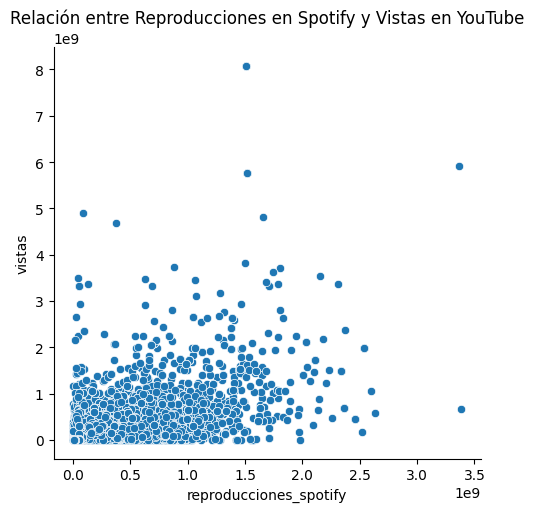

In [31]:
#Correlacion
df_kaggle['reproducciones_spotify'] = pd.to_numeric(df_kaggle['reproducciones_spotify'], errors='coerce')
df_kaggle['vistas'] = pd.to_numeric(df_kaggle['vistas'], errors='coerce')
correlacion =df_kaggle['reproducciones_spotify'].corr(df_kaggle['vistas'])



#Grafico
g=sns.relplot(data=df_kaggle, x="reproducciones_spotify", y="vistas", kind='scatter')
# Agregar el título
g.set(title="Relación entre Reproducciones en Spotify y Vistas en YouTube")



La correlación entre las vistas de YouTube y las reproducciones de Spotify es de aproximadamente", 0.59
Este valor representa una correlación positiva moderada entre ambas variables, lo que significa que, en general,
cuando una variable aumenta, la otra tiende a hacerlo también, aunque esta relación no es perfectamente lineal.
A priori pensaba que esta correlación iba a ser más alta.
Es probable que existan otros factores que influyen en el rendimiento de las canciones en cada plataforma,
como la demografía de la audiencia, el marketing, o el tipo de contenido que funciona mejor en cada plataforma

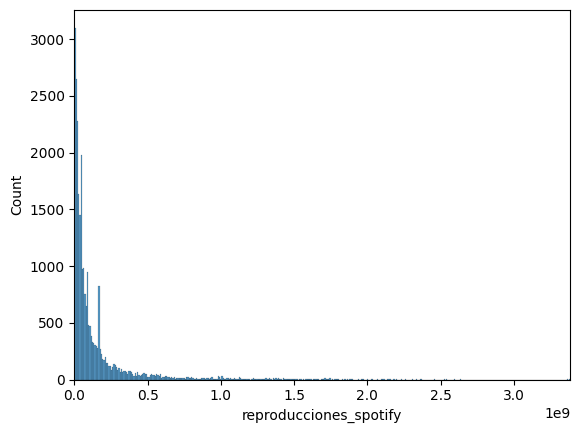

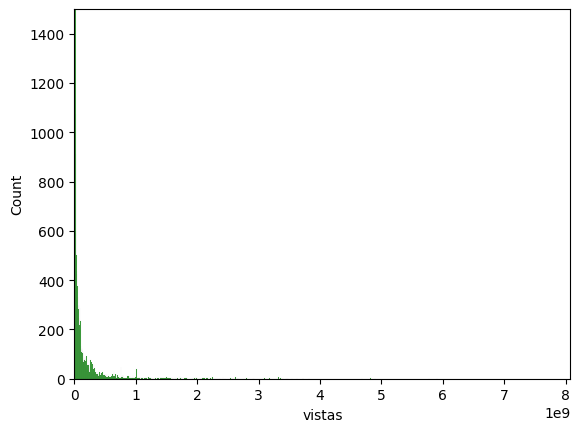

In [32]:
#Reproducciones Spotify
sns.histplot(data=df_kaggle, x="reproducciones_spotify")
plt.xlim(0, df_kaggle["reproducciones_spotify"].max())  # Ajusta 0 como límite inferior
plt.show()



#Reproducciones Youtube
sns.histplot(data=df_kaggle, x="vistas", color="green")
plt.ylim(0, 1500) #Uso 1500 como límite porque los datos llegan mas o menos hasta 1000
plt.xlim(0, df_kaggle["vistas"].max())  # Ajusta 0 como límite inferior
plt.show()



El análisis del gráfico de correlación generó la inquietud sobre la distribución de las reproducciones en YouTube y Spotify.
Inicialmente, se esperaba una distribución normal, donde la mayoría de las canciones tuvieran un número de reproducciones cercano a la media/mediana
y los valores extremos representaran las canciones más populares y menos escuchadas.
Sin embargo, en los histogramas se ve que la mayoría de las canciones presentan muy pocas reproducciones,
sugiriendo una distribución asimétrica, con una concentración de valores bajos y una cola extendida hacia la derecha para las canciones más reproducidas.
Este patrón es común en fenómenos de popularidad, donde solo unas pocas canciones acumulan la mayor parte de las reproducciones.

Punto 7) Hipotesis II 

Hipotesis 2) Recien vimos que la La distribucion de las canciones segun sus vistas y reproducciones no sigue una distribucion normal,
la nueva hipotesis es que si se analiza la valencia(positividad o negatividad de una cancion), hay mas canciones "positivas"(valencia alta)
y esto hace que la distribucion no sea normal.

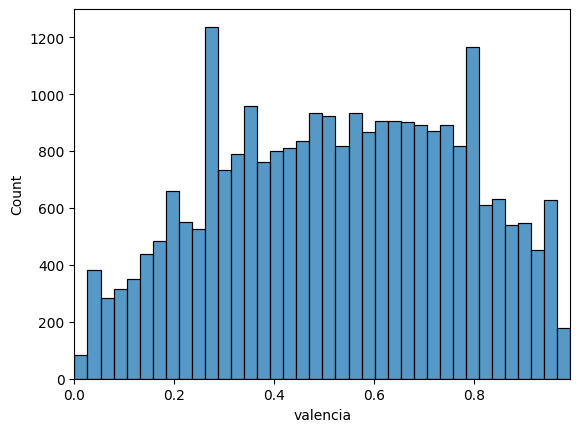

Promedio valencia:  0.5273848829634119
Moda valencia:  0    0.285
Name: valencia, dtype: float64
Mediana valencia:  0.534
Test de kolmogorov-Smirnov
Estadístico KS: 0.0482661662300482
p-valor: 6.851122687673348e-54


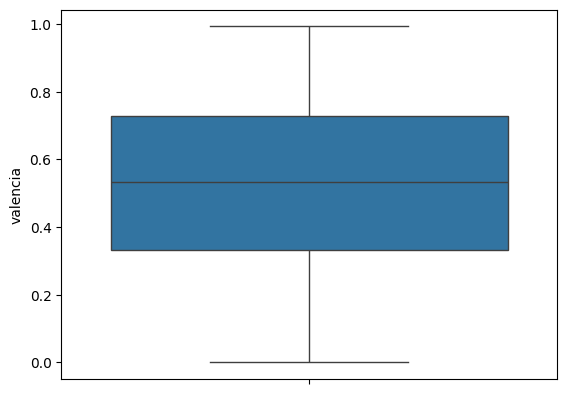

In [33]:
#Reproducciones valencia
sns.histplot(data=df_kaggle, x="valencia")
plt.xlim(0, df_kaggle["valencia"].max())  # Ajusta 0 como límite inferior
plt.show()


sns.boxplot(data=df_kaggle, y="valencia")
plt.show


promedio_valencia= df_kaggle['valencia'].mean()
print("Promedio valencia: ",promedio_valencia)

moda_valencia= df_kaggle['valencia'].mode()
print("Moda valencia: ",moda_valencia)

mediana_valencia= df_kaggle['valencia'].median()
print("Mediana valencia: ", mediana_valencia)



#Test para saber si la distribucion es normal
from scipy import stats

# Realizar el test de Kolmogorov-Smirnov
stat, p_value = stats.kstest(df_kaggle['valencia'], 'norm', args=(df_kaggle['valencia'].mean(), df_kaggle['valencia'].std()))

print("Test de kolmogorov-Smirnov")
print(f"Estadístico KS: {stat}")
print(f"p-valor: {p_value}")


Conclusion
A pesar de que el valor del estadístico KS es relativamente bajo,
lo que sugiere que los datos se ajustan bien a la distribución normal,
el p-valor extremadamente bajo (1.61e-33) indica que la hipótesis nula de normalidad se rechaza con alta confianza.
Esto significa que los datos no siguen una distribución normal.
La moda tan diferente a la media y a la mediana tambien daba un indicio de esto.

Hay una ligera predominancia de canciones con valencia positiva. La media de valencia es 0.52 y la mediana 0.53,
lo que indica una tendencia hacia valores positivos en una escala de 0.0 a 1.0,
donde puntuaciones más altas reflejan emociones positivas (felicidad, euforia) y
las más bajas emociones negativas (tristeza, enojo).

Punto  8) Hipotesis III
Hipotesis 3) Las canciones que aparecen en los albumnes/complilados tienen menos reproducciones/ vistas que las que salen single (en Spotify)

In [34]:
promedio_single= df_kaggle[df_kaggle['album_type']=='single']['reproducciones_spotify'].mean()
print("Promedio single reproducciones: ",promedio_single)

promedio_album= df_kaggle[df_kaggle['album_type']=='album']['reproducciones_spotify'].mean()
print("Promedio de reproducciones si la cancion si sale un un album: ",promedio_album)

promedio_compilados= df_kaggle[df_kaggle['album_type']=='compilation']['reproducciones_spotify'].mean()
print("Promedio de reproducciones si la cancion si sale un un compilado: ",promedio_compilados)

Promedio single reproducciones:  114092091.7270886
Promedio de reproducciones si la cancion si sale un un album:  154947933.73487997
Promedio de reproducciones si la cancion si sale un un compilado:  76645051.05621806


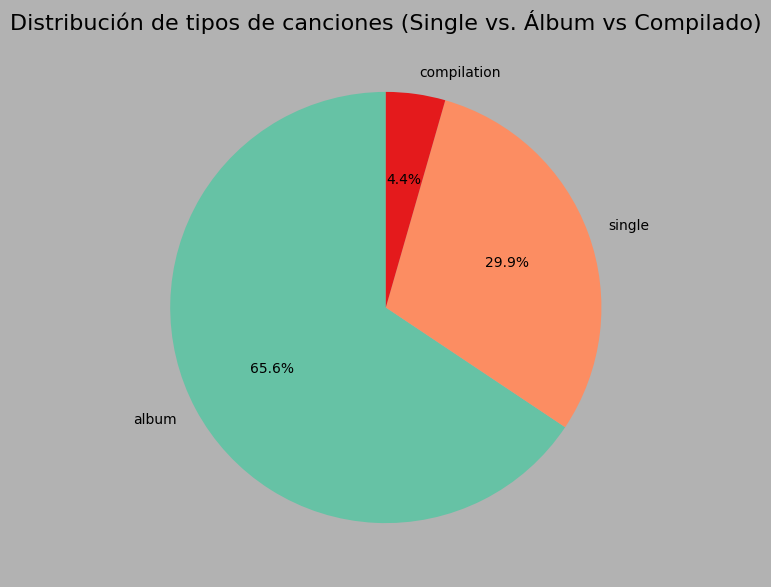

In [35]:
#Contar la cantidad de canciones de cada tipo
conteo_tipos=df_kaggle['album_type'].value_counts()

#Crear grafico de torta
fig,ax =plt.subplots(figsize = (8,7))
fig.set_facecolor('#b2b2b2')

ax.pie(conteo_tipos, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62','#e41a1c'])
ax.set_title("Distribución de tipos de canciones (Single vs. Álbum vs Compilado)", fontsize=16)

plt.show()

La hipótesis planteaba que las canciones que aparecen en álbumes o compilados tienen menos reproducciones/vistas que aquellas lanzadas como singles en Spotify. Sin embargo, los datos obtenidos indican lo contrario.

Punto 9) Analsis de variables. Correlacion y VIF

Se analizará la relación entre todas las variables del dataset utilizando el coeficiente de correlación de Pearson
para medir la intensidad y dirección de las relaciones lineales. Además, se calculará el Factor de Inflación de la Varianza (VIF)
para detectar posibles problemas de multicolinealidad entre las variables predictoras

                        bailabilidad   energia  tonalidad   volumen  \
bailabilidad                1.000000  0.251990   0.089306  0.364039   
energia                     0.251990  1.000000   0.045108  0.744526   
tonalidad                   0.089306  0.045108   1.000000  0.032412   
volumen                     0.364039  0.744526   0.032412  1.000000   
hablabilidad                0.220101  0.074201   0.046758  0.045748   
acustica                   -0.323186 -0.656089  -0.068624 -0.545596   
instrumental               -0.314596 -0.335472  -0.003855 -0.571881   
vivencia                   -0.093955  0.175711  -0.033656  0.080892   
valencia                    0.478731  0.406856   0.086142  0.324755   
tiempo                      0.000402  0.148024   0.043758  0.142068   
duracion                   -0.063368  0.046406   0.026274  0.035649   
vistas                      0.112436  0.068947   0.018255  0.120589   
reproducciones_spotify      0.082337  0.044812  -0.010559  0.125502   
likes 

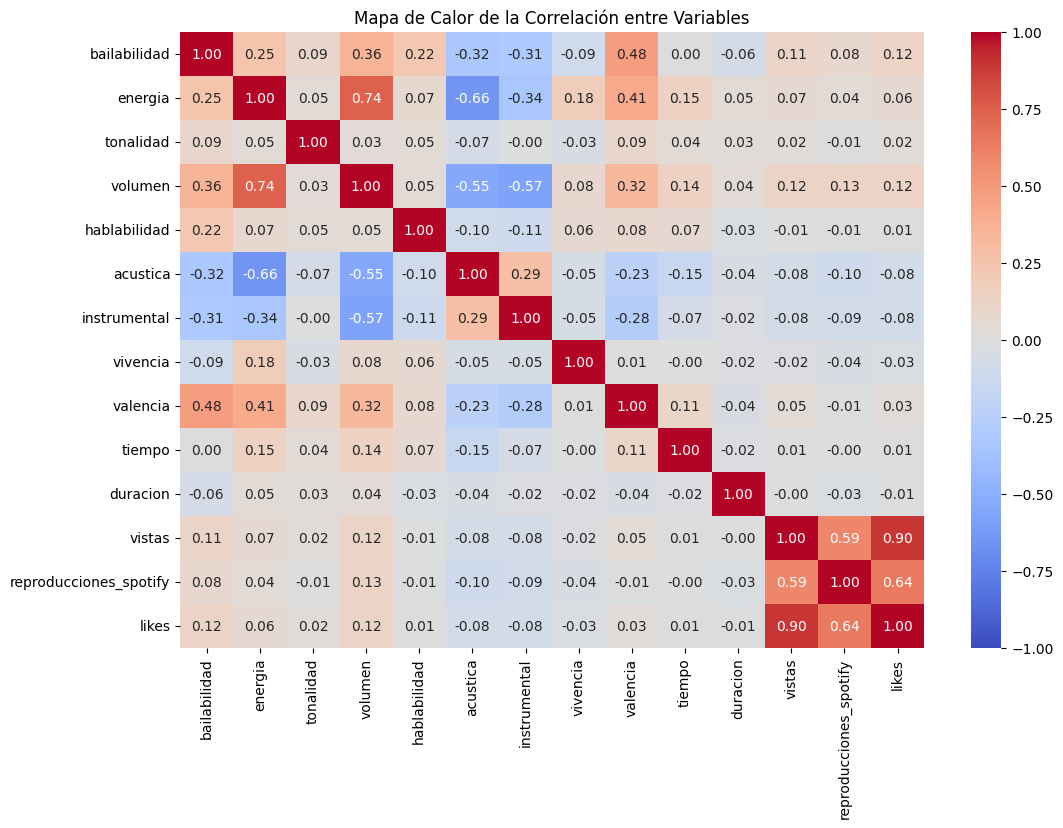

In [36]:
#Analisis pendiente: Correlacion
#hay muchos datos interesantes para ver....pero quedan para la proxima, solo dejo el grafico....esta sera la base para hacer los modelos de regresion o clasificacion

correlacion_total=df_kaggle[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','reproducciones_spotify','likes']].corr()
print(correlacion_total)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_total, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()


                        bailabilidad   energia  tonalidad   volumen  \
bailabilidad                1.000000  0.270129   0.103965  0.364676   
energia                     0.270129  1.000000   0.044412  0.764093   
tonalidad                   0.103965  0.044412   1.000000  0.022095   
volumen                     0.364676  0.764093   0.022095  1.000000   
hablabilidad                0.244310  0.120074   0.063505  0.102240   
acustica                   -0.326403 -0.660331  -0.072273 -0.541409   
instrumental               -0.312337 -0.374379  -0.002005 -0.593305   
vivencia                   -0.089530  0.179248  -0.034410  0.102456   
valencia                    0.488628  0.412201   0.093203  0.328165   
tiempo                      0.011181  0.142486   0.040350  0.135047   
duracion                   -0.101512 -0.023975   0.007878 -0.014783   
vistas                      0.115935  0.071909   0.036170  0.118298   
reproducciones_spotify      0.070200  0.061175   0.006244  0.128784   
likes 

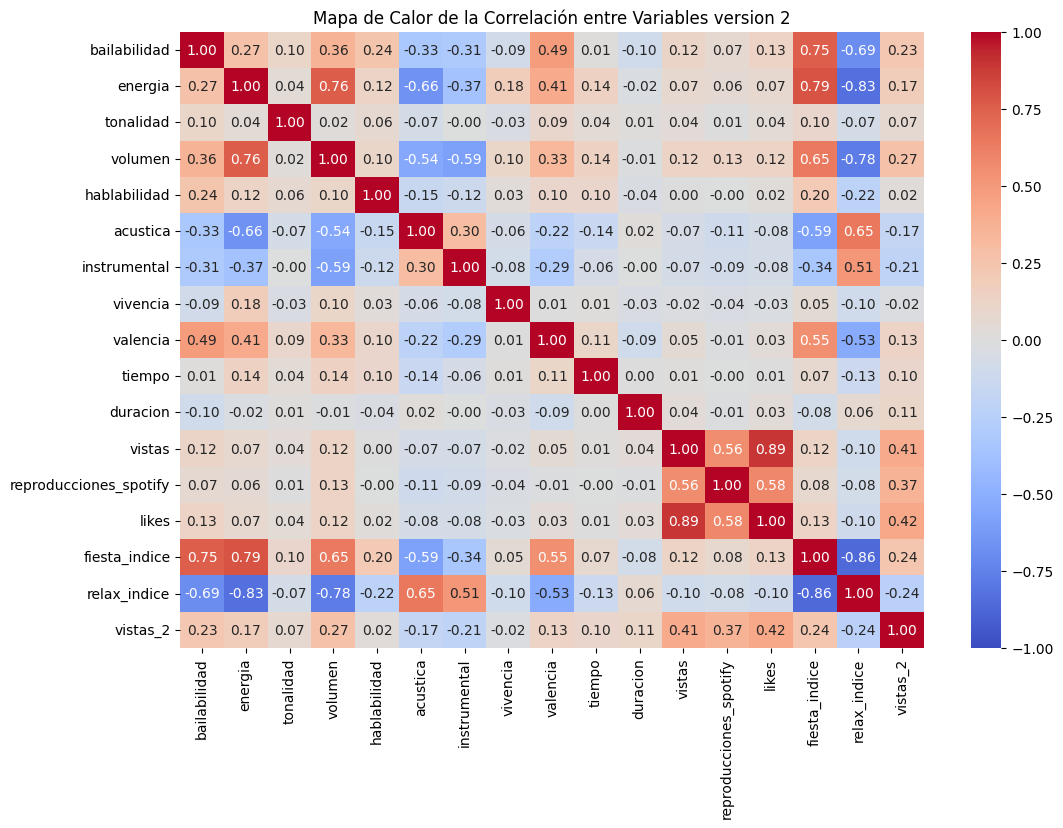

In [37]:
#Correlacion 2, ahora se incluyen las nuevas variables fiesta_indice,relax_indice y vistas_2
#hay muchos datos interesantes para ver....pero quedan para la proxima, solo dejo el grafico....esta sera la base para hacer los modelos de regresion o clasificacion

correlacion_total_2=df_kaggle_clean[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','reproducciones_spotify','likes','fiesta_indice','relax_indice','vistas_2']].corr()
print(correlacion_total_2)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_total_2, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Mapa de Calor de la Correlación entre Variables version 2")
plt.show()

In [38]:
data_ = df_kaggle.select_dtypes(include=['number'])
print(data_)

          id  bailabilidad  energia  tonalidad  volumen  hablabilidad  \
0          0         0.818    0.705        6.0   -6.679        0.1770   
1          1         0.676    0.703        8.0   -5.815        0.0302   
2          2         0.695    0.923        1.0   -3.930        0.0522   
3          2         0.695    0.923        1.0   -3.930        0.0522   
4          2         0.695    0.923        1.0   -3.930        0.0522   
...      ...           ...      ...        ...      ...           ...   
26397  20713         0.582    0.926        5.0   -6.344        0.0328   
26398  20714         0.531    0.936        4.0   -1.786        0.1370   
26399  20715         0.443    0.830        4.0   -4.679        0.0647   
26400  20716         0.417    0.767        9.0   -4.004        0.4190   
26401  20717         0.498    0.938        6.0   -4.543        0.1070   

       acustica  instrumental  vivencia  valencia   tiempo  duracion  \
0       0.00836      0.002330    0.6130    0.7720  

VIP ( VARIANCE INFLATION FACTOR)

Se va a complementar el analisis de correlacion con el VIF.
El VIF (Factor de Inflación de Varianza) es una métrica que evalúa la multicolinealidad entre las variables predictoras en un modelo de regresión.

Multicolinealidad significa que algunas variables están altamente correlacionadas entre sí, lo cual puede distorsionar las estimaciones del modelo y dificultar la interpretación de los coeficientes.
📊 ¿Cómo se interpreta el VIF?
VIF = 1: No hay correlación entre esa variable y las demás (sin multicolinealidad).
VIF entre 1 y 5: Multicolinealidad moderada (aceptable en la mayoría de los casos).
VIF > 5: Multicolinealidad alta (indica que la variable está muy relacionada con otras y podría ser redundante o problemática).
VIF > 10: Multicolinealidad muy severa (se recomienda eliminar o transformar variables).

In [39]:
from sklearn.linear_model import LinearRegression

data_ = df_kaggle.select_dtypes(include=['number']).drop(columns=['vistas','reproducciones_spotify','id'])


# Manual VIF Calculation
vif_manual = {}

for feature in data_ .columns:
    # Define the target variable (current feature) and predictors (all other features)
    y = data_[feature]
    X = data_.drop(columns=[feature])

    # Fit the linear regression model
    model = LinearRegression().fit(X, y)

    # Calculate R-squared
    r_squared = model.score(X, y)

    # Calculate VIF
    vif = 1 / (1 - r_squared)
    vif_manual[feature] = vif

# Convert the dictionary to a DataFrame for better display
vif_manual_df = pd.DataFrame(list(vif_manual.items()), columns=['Feature', 'VIF']).round(2)



In [40]:
# Ajustar la visualización de todas las filas
pd.set_option('display.max_rows', None)

vif_manual_df
print(vif_manual_df)

# Opcional: Restaurar la configuración original si no quieres que se aplique globalmente
pd.reset_option('display.max_rows')

# adaptado desde https://www.datacamp.com/es/tutorial/variance-inflation-factor

         Feature   VIF
0   bailabilidad  1.65
1        energia  3.47
2      tonalidad  1.02
3        volumen  3.30
4   hablabilidad  1.09
5       acustica  1.94
6   instrumental  1.61
7       vivencia  1.07
8       valencia  1.57
9         tiempo  1.05
10      duracion  1.02
11         likes  1.82
12   comentarios  1.73
13   Popularidad  1.06


No hay multicolinealidad severa: Ninguna variable supera el umbral crítico de VIF > 5, lo que indica que las variables no están excesivamente correlacionadas entre sí.
Este conjunto de variables es adecuado para predecir las vistas de una canción, ya que no existe redundancia significativa entre las características

Conclusiones del análisis de correlación y multicolinealidad.
Tras realizar el análisis de correlación y VIF, se concluyó que las nuevas variables creadas, fiesta_indice y relax_indice, 
presentan un elevado grado de correlación con otras variables del modelo, lo que indica que no aportan mucha informacion.
Por otro lado, los valores obtenidos del VIF indican que no existe multicolinealidad significativa entre las variables predictoras,
lo que sugiere que estas variables son independientes entre sí y, por consiguiente, adecuadas para la construcción del modelo.

Punto 10) Chi cuadrado. Tablas de contingencia

Prueba de chi-cuadrado
Evalúa si hay una asociación significativa entre dos variables categóricas.
Compara los valores observados con los valores esperados bajo la hipótesis nula de que no hay relación entre las variables.

Tabla de contingencia (valores observados)
Aca se ve la frecuencia de cada combinación entre generos_reducidos y exito.
generos_reducidos( musica clasica, country, electronica, hip-hop, jazz, latina, musica religiosa, musica tradicional, otros, pop, rock)
exito(Se define la variable "éxito" como aquellas canciones que se encuentran dentro del 20% superior en cantidad de visualizaciones,
considerando este grupo como las canciones con mayor popularidad)

Valores esperados
Estos son los valores que esperaríamos si las variables fueran independientes (sin relación).

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency




df_contigencia=df_kaggle_clean[['generos_reducidos','vistas_2']]
df_contigencia

#creo variable exito
df_contigencia["exito"]=df_contigencia["vistas_2"]>4

df_contigencia


C:\Users\Administrador\AppData\Local\Temp\ipykernel_11480\2907953800.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contigencia["exito"]=df_contigencia["vistas_2"]>4


,generos_reducidos,vistas_2,exito
14,Rock,5,True
15,Rock,5,True
16,Rock,5,True
17,Rock,5,True
18,Rock,5,True
...,...,...,...
26397,Otros,1,False
26398,Otros,1,False
26399,Otros,1,False
26400,Otros,1,False


In [42]:
# Crear una tabla de contingencia
tabla_contingencia_observados = pd.crosstab(index=df_contigencia["exito"], columns= df_contigencia["generos_reducidos"], margins=True)

# podemos crear una tabla de más dimensiones, es decir incluyendo tantas columnas como queramos, acá solo analizamos la Ubicacion
tabla_contingencia_observados

generos_reducidos,Clásica,Country,Electrónica,Hip-Hop,Jazz,Latina,Música Religiosa,Música Tradicional,Otros,Pop,Rock,All
exito,,,,,,,,,,,,
False,495,748,940,2798,527,2414,208,888,1613,3590,2004,16225
True,9,94,289,737,71,945,33,475,161,839,402,4055
All,504,842,1229,3535,598,3359,241,1363,1774,4429,2406,20280


In [43]:
test=chi2_contingency(tabla_contingencia_observados)
test

# primer elemento es el estadistico la diferencia de los elementos al cuadrado

# el segundo es el p-value

# luego una tabla de los valores esperados que es lo que hay que contrastar estadisticamente con los observados

Chi2ContingencyResult(statistic=665.9071430546954, pvalue=1.1950253368178277e-126, dof=22, expected_freq=array([[  403.22485207,   673.64151874,   983.26060158,  2828.17430966,
          478.42948718,  2687.36563116,   192.81188363,  1090.46720907,
         1419.28747535,  3543.4183925 ,  1924.91863905, 16225.        ],
       [  100.77514793,   168.35848126,   245.73939842,   706.82569034,
          119.57051282,   671.63436884,    48.18811637,   272.53279093,
          354.71252465,   885.5816075 ,   481.08136095,  4055.        ],
       [  504.        ,   842.        ,  1229.        ,  3535.        ,
          598.        ,  3359.        ,   241.        ,  1363.        ,
         1774.        ,  4429.        ,  2406.        , 20280.        ]]))

In [44]:
# vamos a verlo mejor dentro de un dataframe
esperados= pd.DataFrame(test[3])
esperados

# valores teoricos esperados sino hubiera relación

,0,1,2,3,4,5,6,7,8,9,10,11
0,403.224852,673.641519,983.260602,2828.17431,478.429487,2687.365631,192.811884,1090.467209,1419.287475,3543.418393,1924.918639,16225.0
1,100.775148,168.358481,245.739398,706.82569,119.570513,671.634369,48.188116,272.532791,354.712525,885.581607,481.081361,4055.0
2,504.000000,842.000000,1229.000000,3535.00000,598.000000,3359.000000,241.000000,1363.000000,1774.000000,4429.000000,2406.000000,20280.0


In [45]:
def porcentaje(x):
    return round(100*(x/len(df)),1)

Obser_relativos= tabla_contingencia_observados.apply(porcentaje)
Obser_relativos

generos_reducidos,Clásica,Country,Electrónica,Hip-Hop,Jazz,Latina,Música Religiosa,Música Tradicional,Otros,Pop,Rock,All
exito,,,,,,,,,,,,
False,2.4,3.6,4.5,13.5,2.5,11.7,1.0,4.3,7.8,17.3,9.7,78.3
True,0.0,0.5,1.4,3.6,0.3,4.6,0.2,2.3,0.8,4.0,1.9,19.6
All,2.4,4.1,5.9,17.1,2.9,16.2,1.2,6.6,8.6,21.4,11.6,97.9


In [46]:
# Transformar los datos en porcentaje
esperados_relativos = esperados.apply(lambda x: round((x / len(df)) * 100,1), axis=1)

# Imprimir los datos en porcentaje
esperados_relativos

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.9,3.3,4.7,13.7,2.3,13.0,0.9,5.3,6.9,17.1,9.3,78.3
1,0.5,0.8,1.2,3.4,0.6,3.2,0.2,1.3,1.7,4.3,2.3,19.6
2,2.4,4.1,5.9,17.1,2.9,16.2,1.2,6.6,8.6,21.4,11.6,97.9


In [47]:
# Realizar la prueba de chi-cuadrado
p_valor = chi2_contingency(tabla_contingencia_observados)

# Imprimir los resultados
if p_valor[1] < 0.05:
    print(f"el Valor p es de {p_valor[1]} y se concluye que hay relación entre las variables")

else:
    print(f"el Valor p es de {p_valor[1]} y se concluye que NO hay relación entre las variables")

el Valor p es de 1.1950253368178277e-126 y se concluye que hay relación entre las variables


Conclusion: Prueba Chi-cuadrado, tabla de contingencia
Valor p = 6.31e-127 (extremadamente pequeño)
Esto indica que la probabilidad de que las diferencias observadas sean producto del azar es prácticamente cero.

Se rechaza la hipótesis nula. Hay evidencia estadísticamente significativa de que existe una relación entre el género musical y el éxito.
Algunos géneros musicales tienen mayor probabilidad de estar asociados con el éxito, mientras que otros tienen una menor probabilidad.
Por ejemplo, Hip-Hop y Latina tienen más éxitos de lo que esperarías por azar, mientras que géneros como Musica Clásica tienen menos éxitos de lo esperado.

Punto 11) Insights

Este proyecto analizó un dataset con canciones presentes en Spotify y YouTube, explorando su popularidad, características musicales y diferencias entre plataformas. Luego del proceso de limpieza y enriquecimiento con la API de Spotify, se respondieron varias preguntas clave:

Análisis general del dataset:
La mayoría de las canciones son rítmicas y energéticas, con una duración típica entre 3 y 4 minutos. Se observó una distribución muy asimétrica en vistas y reproducciones: pocas canciones concentran la mayoría de la popularidad, un patrón clásico en fenómenos virales.

Popularidad Spotify vs YouTube:
Se encontró una correlación positiva moderada (≈ 0.59) entre reproducciones en Spotify y visualizaciones en YouTube. Aunque hay relación, no es tan alta como se esperaba, lo cual sugiere que cada plataforma tiene dinámicas propias de consumo.

Valencia musical:
Aunque muchas canciones tienen valores altos de valencia (positivas/alegres), se comprobó que su distribución no es normal, con una ligera inclinación hacia la positividad. El test de normalidad lo confirmó.

Singles vs Álbumes:
Las canciones que forman parte de un álbum tienen en promedio más reproducciones que los singles o los compilados, por lo que la hipótesis inicial se refuta con los datos observados.

Géneros musicales:
Se detectaron más de 1000 géneros únicos, dificultando el modelado. Para solucionarlo, se agruparon en categorías generales. Sin embargo, muchas canciones no tenían género asignado, lo que motivó pruebas con modelos de clasificación, aunque con resultados limitados.

Exito y genero musical:
Algunos géneros musicales tienen mayor probabilidad de estar asociados con el éxito, mientras que otros tienen una menor probabilidad.
Por ejemplo, Hip-Hop y Latina tienen más éxitos de lo que esperarías por azar, mientras que géneros como Musica Clásica tienen menos éxitos de lo esperado



12) Modelo de clasificacion Randomforest

El objetivo es construir un modelo de aprendizaje supervisado que permita predecir la categoría de popularidad (vistas_2) de un video musical en YouTube. Este tipo de problema se conoce como clasificación supervisada , ya que intentamos predecir una variable categórica (vistas_2), que tiene cinco posibles categorías:

Categoría 1 : Muy pocas vistas.
Categoría 2 : Pocas vistas.
Categoría 3 : Vistas moderadas.
Categoría 4 : Popular.
Categoría 5 : Éxito masivo.
Estas categorías están basadas en percentiles, donde cada una representa un 20% del total de videos. El modelo nos permitirá clasificar automáticamente qué tan exitoso será un video musical en función de sus características.

Inicialmente, se realizó un análisis exploratorio para evaluar las correlaciones entre las características disponibles (como duración del video, likes, comentarios, etc.) y la variable objetivo (vistas_2). Los resultados mostraron correlaciones bajas , lo que indica que las relaciones entre las variables son no lineales y complejas.

En este contexto, un modelo lineal no sería adecuado, ya que asume relaciones lineales entre las características y la variable objetivo. Por ello, se optó por un modelo de Random Forest , que es especialmente útil en situaciones como esta.


In [48]:
# Aplicar One-Hot Encoding a la columna 'genero_reducidos'
print(df_kaggle_clean.columns)

df_kaggle_clean = pd.get_dummies(df_kaggle_clean, columns=['generos_reducidos'], prefix='genero')

df_kaggle_clean

Index(['id', 'artista', 'Uri', 'cancion', 'album_type', 'bailabilidad',
       'energia', 'tonalidad', 'volumen', 'hablabilidad', 'acustica',
       'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion', 'vistas',
       'likes', 'comentarios', 'reproducciones_spotify', 'Nombre', 'Artista',
       'Popularidad', 'Géneros', 'generos_reducidos', 'fiesta_indice',
       'relax_indice', 'vistas_2'],
      dtype='object')


,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,...,genero_Country,genero_Electrónica,genero_Hip-Hop,genero_Jazz,genero_Latina,genero_Música Religiosa,genero_Música Tradicional,genero_Otros,genero_Pop,genero_Rock
14,10,Red Hot Chili Peppers,spotify:track:48UPSzbZjgc449aqz8bxox,Californication,album,0.592,0.767,9.0,-2.788,0.0270,...,False,False,False,False,False,False,False,False,False,True
15,11,Red Hot Chili Peppers,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,Under the Bridge,album,0.559,0.345,4.0,-13.496,0.0459,...,False,False,False,False,False,False,False,False,False,True
16,12,Red Hot Chili Peppers,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,Can't Stop,album,0.618,0.938,9.0,-3.442,0.0456,...,False,False,False,False,False,False,False,False,False,True
17,13,Red Hot Chili Peppers,spotify:track:1G391cbiT3v3Cywg8T7DM1,Scar Tissue,album,0.595,0.717,0.0,-4.803,0.0295,...,False,False,False,False,False,False,False,False,False,True
18,14,Red Hot Chili Peppers,spotify:track:64BbK9SFKH2jk86U3dGj2P,Otherside,album,0.458,0.795,0.0,-3.265,0.0574,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26397,20713,SICK LEGEND,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,...,False,False,False,False,False,False,False,True,False,False
26398,20714,SICK LEGEND,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,...,False,False,False,False,False,False,False,True,False,False
26399,20715,SICK LEGEND,spotify:track:4jk00YxPtPbhvHJE9N4ddv,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,...,False,False,False,False,False,False,False,True,False,False
26400,20716,SICK LEGEND,spotify:track:5EyErbpsugWliX006eTDex,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,...,False,False,False,False,False,False,False,True,False,False


In [49]:
#data set
df_kaggle_clean.columns
df_kaggle_clean.tail()

,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,...,genero_Country,genero_Electrónica,genero_Hip-Hop,genero_Jazz,genero_Latina,genero_Música Religiosa,genero_Música Tradicional,genero_Otros,genero_Pop,genero_Rock
26397,20713,SICK LEGEND,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,...,False,False,False,False,False,False,False,True,False,False
26398,20714,SICK LEGEND,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,...,False,False,False,False,False,False,False,True,False,False
26399,20715,SICK LEGEND,spotify:track:4jk00YxPtPbhvHJE9N4ddv,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,...,False,False,False,False,False,False,False,True,False,False
26400,20716,SICK LEGEND,spotify:track:5EyErbpsugWliX006eTDex,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,...,False,False,False,False,False,False,False,True,False,False
26401,20717,SICK LEGEND,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,MISS YOU HARDSTYLE,single,0.498,0.938,6.0,-4.543,0.1070,...,False,False,False,False,False,False,False,True,False,False


In [50]:
df_kaggle_clean.describe()

,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify,Popularidad,fiesta_indice,relax_indice
count,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,2.028000e+04,2.028000e+04,2.028000e+04,2.028000e+04,2.028000e+04,20280.000000,20280.000000,20280.000000
mean,9948.527663,0.611826,0.639760,5.266420,-7.627737,0.094150,0.312668,0.054643,0.195892,0.536393,119.336641,2.304289e+05,9.100090e+07,6.285242e+05,2.611877e+04,1.189363e+08,56.967456,0.401239,0.149653
std,6107.652358,0.172771,0.210356,3.574222,4.650926,0.097344,0.280840,0.193614,0.175613,0.243240,29.772445,8.980807e+04,2.787574e+08,1.762978e+06,2.020711e+05,2.059165e+08,19.783682,0.173194,0.144201
min,10.000000,0.000000,0.000252,0.000000,-44.761000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,4.282700e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03,0.000000,0.000000,0.000672
25%,4533.750000,0.508000,0.526000,2.000000,-8.551250,0.036800,0.065175,0.000000,0.094475,0.338000,95.938750,1.830875e+05,1.977302e+06,2.206000e+04,5.170000e+02,1.983803e+07,53.000000,0.281319,0.055947
50%,9666.500000,0.630000,0.667000,5.000000,-6.623000,0.051400,0.234000,0.000001,0.126000,0.549000,117.005000,2.175470e+05,1.482532e+07,1.244745e+05,3.277000e+03,4.985243e+07,62.000000,0.417504,0.101010
75%,15138.250000,0.740000,0.795000,8.000000,-4.956000,0.108000,0.513000,0.000279,0.225000,0.739000,138.655250,2.572432e+05,6.976850e+07,5.571110e+05,1.438400e+04,1.291848e+08,69.000000,0.527423,0.191807
max,20717.000000,0.975000,0.998000,11.000000,0.920000,0.964000,0.996000,0.988000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.362005e+09,95.000000,0.898660,0.999748


In [51]:
# Aplicar One-Hot Encoding a la columna 'genero_reducidos'
print(df_kaggle_clean.columns)

#df_kaggle_clean = pd.get_dummies(df_kaggle_clean, columns=['generos_reducidos'], prefix='genero')

df_kaggle_clean

Index(['id', 'artista', 'Uri', 'cancion', 'album_type', 'bailabilidad',
       'energia', 'tonalidad', 'volumen', 'hablabilidad', 'acustica',
       'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion', 'vistas',
       'likes', 'comentarios', 'reproducciones_spotify', 'Nombre', 'Artista',
       'Popularidad', 'Géneros', 'fiesta_indice', 'relax_indice', 'vistas_2',
       'genero_Clásica', 'genero_Country', 'genero_Electrónica',
       'genero_Hip-Hop', 'genero_Jazz', 'genero_Latina',
       'genero_Música Religiosa', 'genero_Música Tradicional', 'genero_Otros',
       'genero_Pop', 'genero_Rock'],
      dtype='object')


,id,artista,Uri,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,...,genero_Country,genero_Electrónica,genero_Hip-Hop,genero_Jazz,genero_Latina,genero_Música Religiosa,genero_Música Tradicional,genero_Otros,genero_Pop,genero_Rock
14,10,Red Hot Chili Peppers,spotify:track:48UPSzbZjgc449aqz8bxox,Californication,album,0.592,0.767,9.0,-2.788,0.0270,...,False,False,False,False,False,False,False,False,False,True
15,11,Red Hot Chili Peppers,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,Under the Bridge,album,0.559,0.345,4.0,-13.496,0.0459,...,False,False,False,False,False,False,False,False,False,True
16,12,Red Hot Chili Peppers,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,Can't Stop,album,0.618,0.938,9.0,-3.442,0.0456,...,False,False,False,False,False,False,False,False,False,True
17,13,Red Hot Chili Peppers,spotify:track:1G391cbiT3v3Cywg8T7DM1,Scar Tissue,album,0.595,0.717,0.0,-4.803,0.0295,...,False,False,False,False,False,False,False,False,False,True
18,14,Red Hot Chili Peppers,spotify:track:64BbK9SFKH2jk86U3dGj2P,Otherside,album,0.458,0.795,0.0,-3.265,0.0574,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26397,20713,SICK LEGEND,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,...,False,False,False,False,False,False,False,True,False,False
26398,20714,SICK LEGEND,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,...,False,False,False,False,False,False,False,True,False,False
26399,20715,SICK LEGEND,spotify:track:4jk00YxPtPbhvHJE9N4ddv,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,...,False,False,False,False,False,False,False,True,False,False
26400,20716,SICK LEGEND,spotify:track:5EyErbpsugWliX006eTDex,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,...,False,False,False,False,False,False,False,True,False,False


In [52]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Definir características (features) y variable objetivo (target)
features = [
    'bailabilidad', 'energia','tonalidad', 'volumen','hablabilidad',
    'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo', 'duracion','fiesta_indice','relax_indice',

    'genero_Clásica', 'genero_Country', 'genero_Electrónica','genero_Hip-Hop', 'genero_Jazz', 'genero_Latina',
    'genero_Música Religiosa', 'genero_Música Tradicional', 'genero_Otros','genero_Pop', 'genero_Rock'
]
target = 'vistas_2'

# Filtrar datos para entrenamiento
x = df_kaggle_clean[features]  # Características numéricas
y = df_kaggle_clean[target]   # Variable objetivo (géneros reducidos)

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar modelo RandomForest
clf=RandomForestClassifier()
hiperparametros={'max_depth':[50,100],'min_samples_leaf':[3,5],'max_leaf_nodes':[50,100],'n_estimators':[100,200]}
grilla=GridSearchCV(clf,hiperparametros,cv=3,scoring='accuracy',verbose=3)

grilla.fit(x_train, y_train)

grilla.best_params_
grilla.best_score_

#fit best model
modelo_clf=grilla.best_estimator_
modelo_clf.fit(x_train,y_train)


#hago predicciones
y_pred_test=modelo_clf.predict(x_test)
y_pred_train=modelo_clf.predict(x_train)





Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=100;, score=0.394 total time=   1.8s
[CV 2/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=100;, score=0.395 total time=   1.8s
[CV 3/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=100;, score=0.388 total time=   1.9s
[CV 1/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=200;, score=0.390 total time=   3.9s
[CV 2/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=200;, score=0.394 total time=   3.6s
[CV 3/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=200;, score=0.389 total time=   3.9s
[CV 1/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=5, n_estimators=100;, score=0.396 total time=   1.9s
[CV 2/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=5, n_estimators=100;, score=0.398 total time=   1.8s
[CV 3/3] EN

In [53]:
grilla.best_params_



{'max_depth': 50,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 3,
 'n_estimators': 200}

In [54]:
# Calcular la precisión del modelo en entrenamiento
score_train_modelo_clf = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", score_train_modelo_clf)

# Generar reporte de clasificación train
reporte_train = classification_report(y_train, y_pred_train)

# Mostrar el reporte train
print(reporte_train)




Train Accuracy: 0.5098619329388561
              precision    recall  f1-score   support

           1       0.67      0.49      0.57      3248
           2       0.41      0.51      0.46      3236
           3       0.73      0.29      0.42      3257
           4       0.46      0.55      0.50      3233
           5       0.49      0.70      0.58      3250

    accuracy                           0.51     16224
   macro avg       0.55      0.51      0.50     16224
weighted avg       0.55      0.51      0.50     16224



In [55]:
# Calcular la precisión del modelo de prueba
score_test_modelo_clf = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", score_test_modelo_clf)

# Generar reporte de clasificación test
reporte_test = classification_report(y_test, y_pred_test)

# Mostrar el reporte test
print(reporte_test)


Test Accuracy: 0.4307199211045365
              precision    recall  f1-score   support

           1       0.61      0.44      0.51       809
           2       0.33      0.43      0.37       821
           3       0.58      0.23      0.33       797
           4       0.38      0.45      0.41       824
           5       0.44      0.62      0.51       805

    accuracy                           0.43      4056
   macro avg       0.47      0.43      0.43      4056
weighted avg       0.47      0.43      0.43      4056



In [56]:
importances = modelo_clf.feature_importances_

# Obtener los nombres de las variables
feature_names = x_train.columns

# Crear un DataFrame con las importancias de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values('Importance', ascending=False)


importance_df



,Variable,Importance
3,volumen,0.111965
10,duracion,0.104982
11,fiesta_indice,0.095667
0,bailabilidad,0.092496
9,tiempo,0.080527
12,relax_indice,0.073222
1,energia,0.065670
5,acustica,0.064956
8,valencia,0.064280
4,hablabilidad,0.055352


13) Modelo de clasificacion Randomforest (el mismo modelo que el punto 12, solo que ahora tomo en cuenta las mejores variables solamente)

In [57]:
# Calcular la contribución acumulativa
importance_df['Contribución Acumulativa'] = importance_df['Importance'].cumsum()

# Mostrar las características hasta alcanzar un umbral (por ejemplo, 90%)
umbral = 0.90
selected_features = importance_df[importance_df['Contribución Acumulativa'] <= umbral]

# Mostrar las características seleccionadas
print("\nCaracterísticas seleccionadas (contribución acumulativa <= 95%):")
print(selected_features)


Características seleccionadas (contribución acumulativa <= 95%):
         Variable  Importance  Contribución Acumulativa
3         volumen    0.111965                  0.111965
10       duracion    0.104982                  0.216947
11  fiesta_indice    0.095667                  0.312615
0    bailabilidad    0.092496                  0.405111
9          tiempo    0.080527                  0.485638
12   relax_indice    0.073222                  0.558860
1         energia    0.065670                  0.624530
5        acustica    0.064956                  0.689485
8        valencia    0.064280                  0.753766
4    hablabilidad    0.055352                  0.809118
6    instrumental    0.049503                  0.858621


In [58]:
# Extraer los nombres de las características seleccionadas
selected_feature_names = selected_features['Variable'].tolist()
selected_feature_names


['volumen',
 'duracion',
 'fiesta_indice',
 'bailabilidad',
 'tiempo',
 'relax_indice',
 'energia',
 'acustica',
 'valencia',
 'hablabilidad',
 'instrumental']

In [59]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Definir características (features) y variable objetivo (target)
features = selected_feature_names
target = 'vistas_2'

# Filtrar datos para entrenamiento
x = df_kaggle_clean[features]  # Características numéricas
y = df_kaggle_clean[target]   # Variable objetivo (géneros reducidos)

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar modelo RandomForest
clf=RandomForestClassifier()
hiperparametros={'max_depth':[50,100],'min_samples_leaf':[3,5],'max_leaf_nodes':[50,100],'n_estimators':[100,200]}
grilla=GridSearchCV(clf,hiperparametros,cv=3,scoring='accuracy',verbose=3)

grilla.fit(x_train, y_train)

grilla.best_params_
grilla.best_score_

#fit best model
modelo_clf=grilla.best_estimator_
modelo_clf.fit(x_train,y_train)


#hago predicciones
y_pred_test=modelo_clf.predict(x_test)
y_pred_train=modelo_clf.predict(x_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=100;, score=0.393 total time=   3.3s
[CV 2/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=100;, score=0.382 total time=   2.9s
[CV 3/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=100;, score=0.385 total time=   3.4s
[CV 1/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=200;, score=0.393 total time=   6.2s
[CV 2/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=200;, score=0.386 total time=   5.1s
[CV 3/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=200;, score=0.381 total time=   5.2s
[CV 1/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=5, n_estimators=100;, score=0.392 total time=   2.4s
[CV 2/3] END max_depth=50, max_leaf_nodes=50, min_samples_leaf=5, n_estimators=100;, score=0.388 total time=   2.6s
[CV 3/3] EN

In [60]:
grilla.best_params_

{'max_depth': 100,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [61]:
# Calcular la precisión del modelo en entrenamiento
score_train_modelo_clf = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", score_train_modelo_clf)

# Generar reporte de clasificación train
reporte_train = classification_report(y_train, y_pred_train)

# Mostrar el reporte train
print(reporte_train)

Train Accuracy: 0.5053007889546351
              precision    recall  f1-score   support

           1       0.67      0.50      0.57      3248
           2       0.42      0.49      0.45      3236
           3       0.68      0.30      0.42      3257
           4       0.46      0.55      0.50      3233
           5       0.47      0.69      0.56      3250

    accuracy                           0.51     16224
   macro avg       0.54      0.51      0.50     16224
weighted avg       0.54      0.51      0.50     16224



In [62]:
# Calcular la precisión del modelo de prueba
score_test_modelo_clf = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", score_test_modelo_clf)

# Generar reporte de clasificación test
reporte_test = classification_report(y_test, y_pred_test)

# Mostrar el reporte test
print(reporte_test)

Test Accuracy: 0.4203648915187377
              precision    recall  f1-score   support

           1       0.61      0.43      0.51       809
           2       0.32      0.40      0.36       821
           3       0.55      0.24      0.33       797
           4       0.37      0.40      0.39       824
           5       0.42      0.62      0.50       805

    accuracy                           0.42      4056
   macro avg       0.45      0.42      0.42      4056
weighted avg       0.45      0.42      0.42      4056



Los modelos del punto 12 y 13 no tienen muy buenas métricas... mm... no sé bien cómo mejorarlos.
En el primer curso había hecho modelos lineales, pero no habían funcionado bien: las correlaciones lineales eran bajas, los datos estaban desbalanceados. En ese caso, la variable objetivo era el éxito musical (es decir, las canciones con más visualizaciones, el 10% más alto).

Ahora probé con tener 5 clases balanceadas (después pensaba probar como antes: ver si puedo predecir el 10% de las canciones con más visualizaciones, usar SMOTE, etc.).
Ahora tengo 5 clases y uso RandomForestClassifier. No estandarizo porque en este caso no influye tanto. Uso validación cruzada (cv=3), usé una grilla para probar varios parámetros, etc. Estuve variando los parámetros, la validación cruzada... y, a lo sumo, parecía que mejoraba, pero cuando hago el testeo, no mejora.

¿Los modelos están bien? ¿Falta algo?

Como dato curioso... los datos nuevos de la API, como los géneros musicales, parecen no ser muy importantes.


